# **CUSTOMER CHURN PREDICTION**

### Importing Libraries

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, precision_score, recall_score, f1_score

In [66]:
df=pd.read_csv('C:/Users/shikh/OneDrive/Desktop/codsoft ml project/Data/Task3/Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [67]:
df.drop(['CustomerId','Surname','RowNumber'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [69]:
#descriptive statistics
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [70]:
#no of unique value in each colomn
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [71]:
#no of duplicate row in data
df.duplicated().sum()

np.int64(0)

In [72]:
#checking for null value 
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [73]:
#changing age datatype to int32
df['Age'].astype('int32')

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int32

In [74]:
#checking value count of each categarical colomns
print(df['Balance'].value_counts())
print(df['CreditScore'].value_counts())
print(df['EstimatedSalary'].value_counts())
print(df['Exited'].value_counts())
print(df['Gender'].value_counts())
print(df['Geography'].value_counts())
print(df['HasCrCard'].value_counts())
print(df['IsActiveMember'].value_counts())
print(df['NumOfProducts'].value_counts())
print(df['Tenure'].value_counts())


Balance
0.00         3617
130170.82       2
105473.74       2
113957.01       1
85311.70        1
             ... 
88381.21        1
155060.41       1
57369.61        1
75075.31        1
116363.37       1
Name: count, Length: 6382, dtype: int64
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
358      1
412      1
382      1
373      1
419      1
Name: count, Length: 460, dtype: int64
EstimatedSalary
24924.92     2
140469.38    1
51695.41     1
151325.24    1
64327.26     1
            ..
2988.28      1
99595.67     1
53445.17     1
115146.40    1
23101.13     1
Name: count, Length: 9999, dtype: int64
Exited
0    7963
1    2037
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
NumOfProducts
1    5084
2    4590
3     266


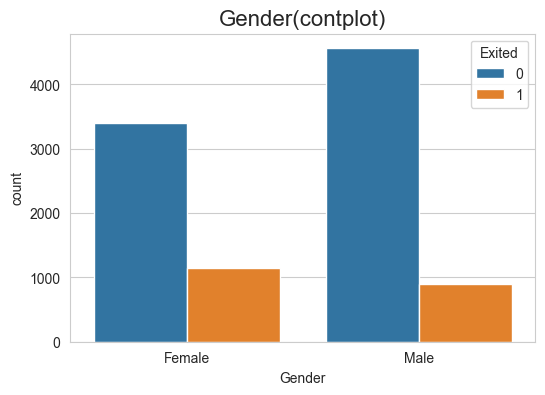

In [75]:
#countplots of gender colomns
#fig,ax=plt.subplots(3,2,figsize=(20,12))
plt.figure(figsize=(6,4))
sns.countplot(x ='Gender', data = df, hue ='Exited' )
plt.title('Gender(contplot)', fontsize=16)
plt.show()

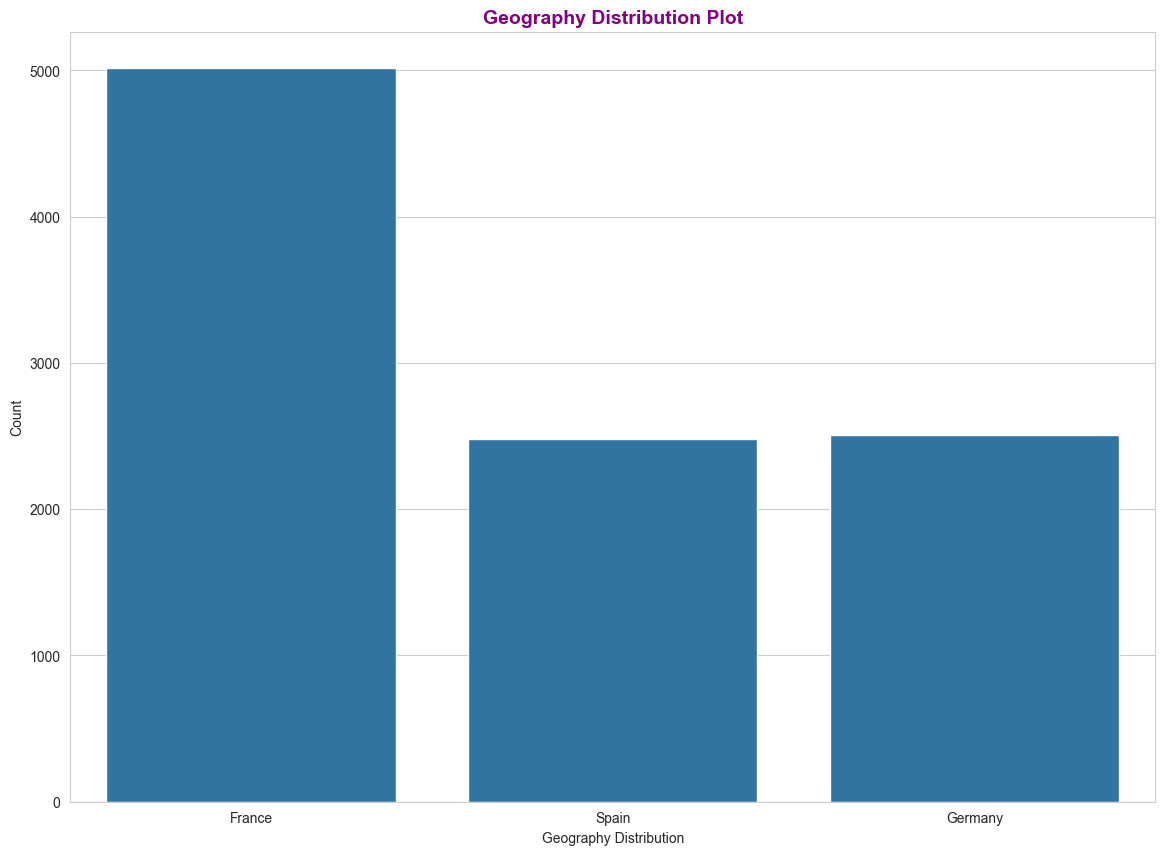

In [76]:
plt.figure(figsize=(14,10))
sns.countplot(x='Geography', data=df)
plt.xlabel('Geography Distribution')
plt.ylabel('Count')
plt.title('Geography Distribution Plot',fontsize=14, fontweight="bold", color = "purple")
plt.show()

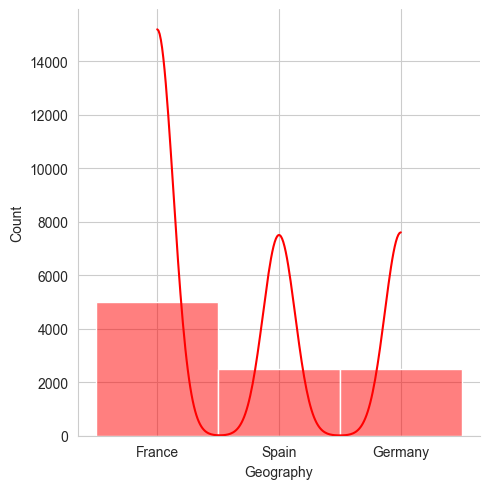

In [77]:
sns.displot(df.Geography, kde =True, color = "red")

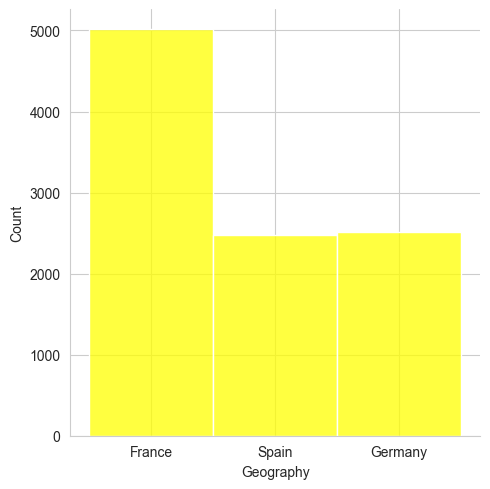

In [78]:
sns.displot(df.Geography, color = "yellow")

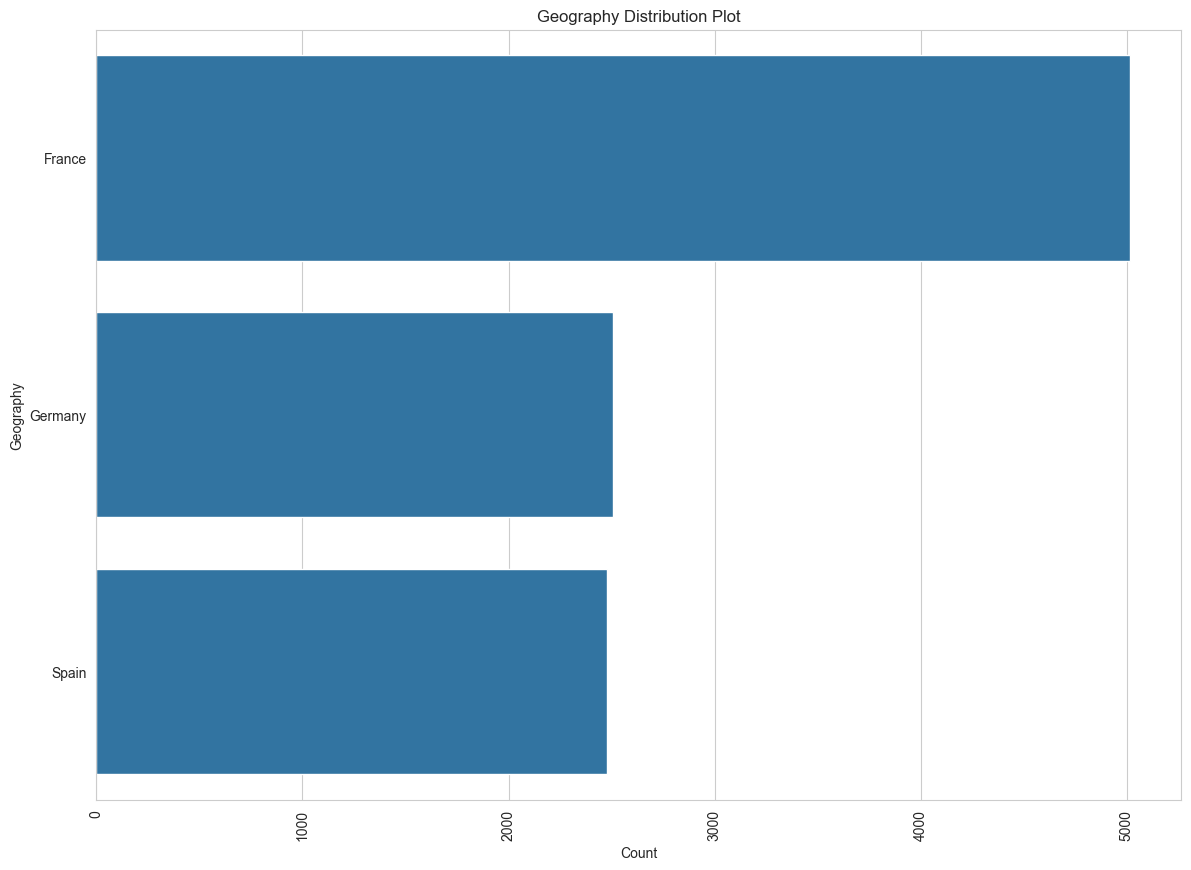

In [79]:
plt.figure(figsize = (14,10))
count1 = df.Geography.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h')
plt.xlabel('Count')
plt.ylabel('Geography')
plt.title('Geography Distribution Plot')
plt.xticks(rotation=90)
plt.show()

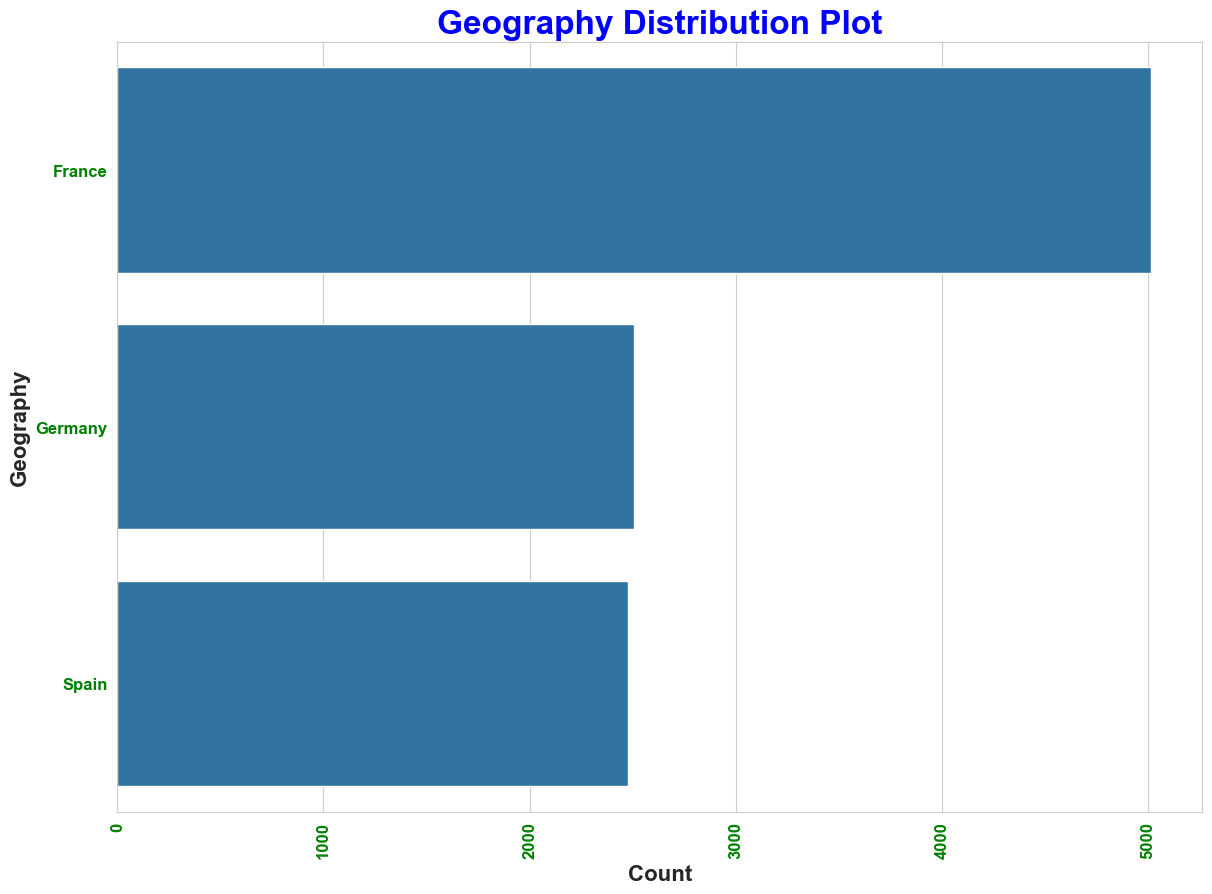

In [80]:
plt.figure(figsize = (14,10))
count1 = df.Geography.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h')
plt.xlabel('Count', fontsize = 16, fontweight = 'bold')
plt.ylabel('Geography', fontsize = 16, fontweight = 'bold')
plt.title('Geography Distribution Plot', fontsize = 24, fontweight = 'bold', color = 'blue')
plt.xticks(rotation=90, fontsize = 12, fontweight = 'bold', color = 'green')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'green')
plt.show()

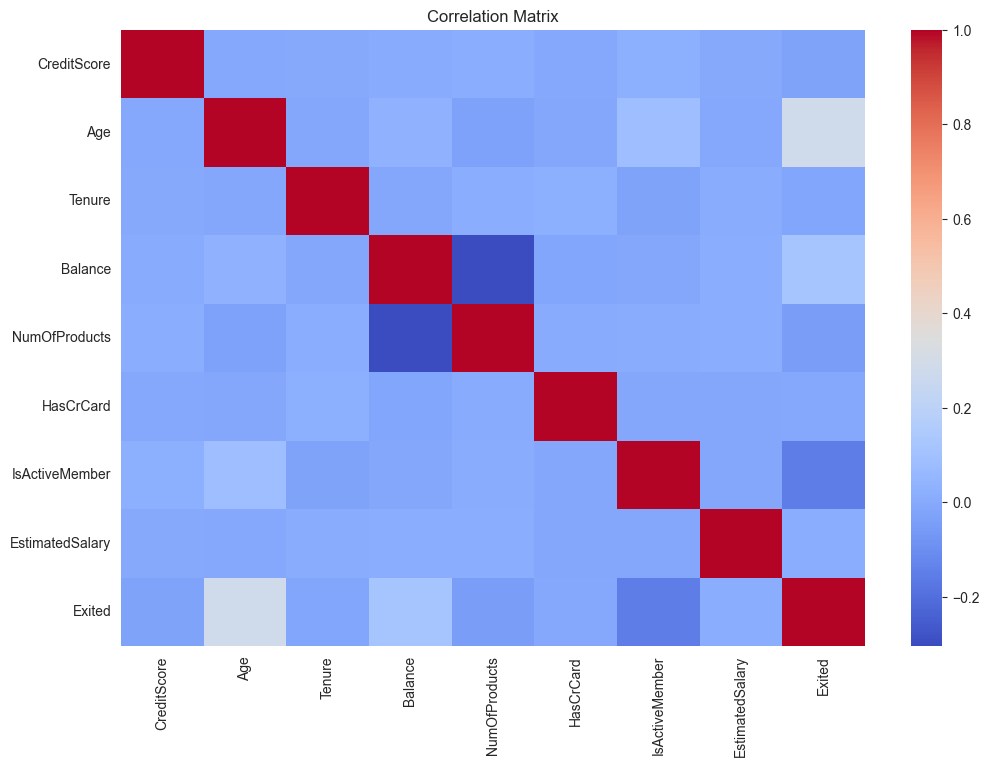

In [86]:
correlation_matrix = df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = False,  fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Preprocess The Data 

In [87]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [88]:
X = df.drop("Exited", axis = 1)
y = df["Exited"]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

Regression 

In [91]:
lr_model = LogisticRegression()

In [92]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [93]:
lr_predictions = lr_model.predict(X_test)

In [94]:
print("Logistic Regression Model:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))
print("r2_Score: ", r2_score(y_test, lr_predictions))
print("Precision_score: ", precision_score(y_test, lr_predictions))
print("Recall_score: ", recall_score(y_test, lr_predictions))
print("f1_score: ", f1_score(y_test, lr_predictions))

Logistic Regression Model:
[[1559   48]
 [ 333   60]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1607
           1       0.56      0.15      0.24       393

    accuracy                           0.81      2000
   macro avg       0.69      0.56      0.57      2000
weighted avg       0.77      0.81      0.76      2000

Accuracy:  0.8095
r2_Score:  -0.20655338998750716
Precision_score:  0.5555555555555556
Recall_score:  0.15267175572519084
f1_score:  0.23952095808383234


### Train Random forests model 

In [95]:
rf_model = RandomForestClassifier(n_estimators=1000, n_jobs = -1, random_state=42)

In [96]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [97]:
rf_predictions = rf_model.predict(X_test)

In [99]:
print("Random Forest Model:")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print("Accuracy: ", accuracy_score(y_test, rf_predictions))
print("r2_Score: ", r2_score(y_test, rf_predictions))
print("Precision_score: ", precision_score(y_test, rf_predictions))
print("Recall_score: ", recall_score(y_test, rf_predictions))
print("f1_score: ", f1_score(y_test, rf_predictions))

Random Forest Model:
[[1551   56]
 [ 224  169]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.75      0.43      0.55       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

Accuracy:  0.86
r2_Score:  0.11329409659710765
Precision_score:  0.7511111111111111
Recall_score:  0.4300254452926209
f1_score:  0.5469255663430421


### Train Gradient Boosting Model

In [100]:
gb_model = GradientBoostingClassifier(n_estimators=1000, learning_rate = 0.02, max_depth = 1, random_state=42)

In [101]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000,
                           random_state=42)

In [102]:
gb_predictions = gb_model.predict(X_test)

In [103]:
print("Gradient Boosting Model:")
print(confusion_matrix(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))
print("Accuracy: ", accuracy_score(y_test, gb_predictions))
print("r2_Score: ", r2_score(y_test, gb_predictions))
print("Precision_score: ", precision_score(y_test, gb_predictions))
print("Recall_score: ", recall_score(y_test, gb_predictions))
print("f1_score: ", f1_score(y_test, gb_predictions))

Gradient Boosting Model:
[[1551   56]
 [ 227  166]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.75      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000

Accuracy:  0.8585
r2_Score:  0.10379367620350521
Precision_score:  0.7477477477477478
Recall_score:  0.4223918575063613
f1_score:  0.5398373983739837
